In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
s = df.isna().sum()
s[s>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

## Seperate X and Y features
Weight ~ other remaining features

In [5]:
X = df.drop(columns=['id', 'Weight'])
Y = df[['Weight']]

In [6]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [7]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Seperate cat and con for X features

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [10]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

## Create a features selection Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [13]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [14]:
X_pre = pre.fit_transform(X)
X_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0.000000,30.0,41.0,5.0,1.0,1.0,2.0,1.0,1.0,88.0
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0.039228,30.0,64.0,0.0,1.0,1.0,1.0,1.0,1.0,90.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.396643,30.0,28.0,4.0,1.0,1.0,3.0,1.0,1.0,87.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.039228,31.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,91.0


In [16]:
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(X_pre, Y)
mr

array([0.69511442, 0.5714708 , 0.49207008, 0.86223802, 0.71557658,
       1.1322228 , 0.72929303, 0.14053614, 0.45180573, 0.92623695,
       0.28413885, 0.52044282, 0.80867643, 0.86119913, 0.41727766,
       0.27123737, 0.57961136, 0.03330002, 0.        , 0.78614114,
       0.12589978, 0.13309062, 0.61032463, 0.2287371 , 0.        ,
       0.06262008])

In [17]:
mr = pd.Series(mr)
mr.index = X_pre.columns
mr = mr.sort_values(ascending=False)
mr

num__EngineSize            1.132223
num__Fuel.tank.capacity    0.926237
num__MPG.city              0.862238
num__Width                 0.861199
num__Wheelbase             0.808676
cat__Type                  0.786141
num__Horsepower            0.729293
num__MPG.highway           0.715577
num__Min.Price             0.695114
cat__Cylinders             0.610325
num__Luggage.room          0.579611
num__Price                 0.571471
num__Length                0.520443
num__Max.Price             0.492070
num__Rev.per.mile          0.451806
num__Turn.circle           0.417278
num__Passengers            0.284139
num__Rear.seat.room        0.271237
cat__Man.trans.avail       0.228737
num__RPM                   0.140536
cat__DriveTrain            0.133091
cat__AirBags               0.125900
cat__Make                  0.062620
cat__Manufacturer          0.033300
cat__Model                 0.000000
cat__Origin                0.000000
dtype: float64

<Axes: title={'center': 'Most important feature'}>

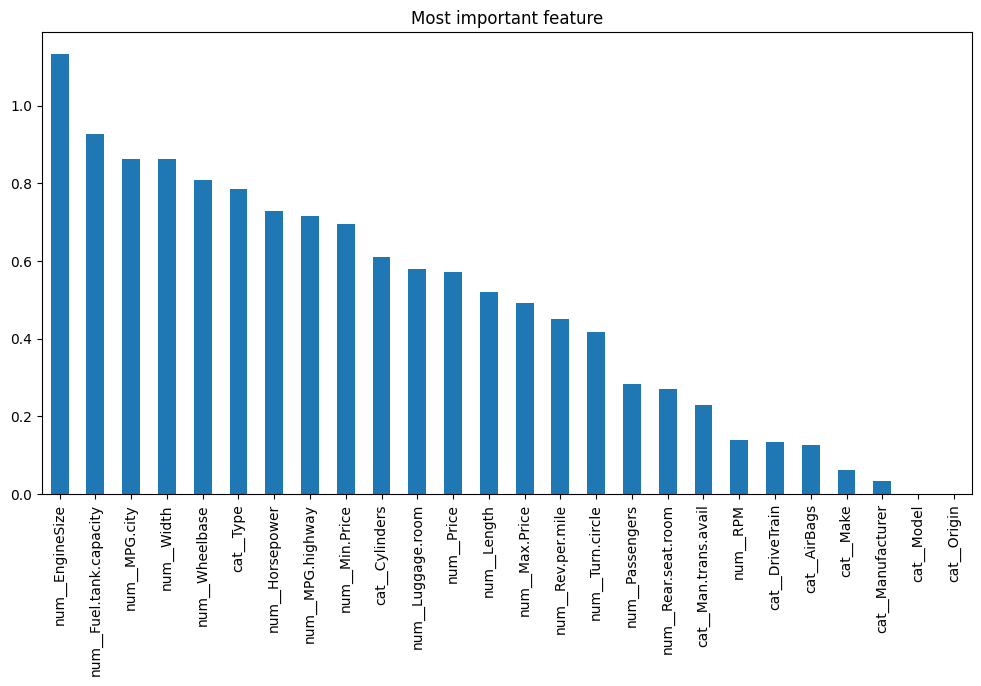

In [20]:
mr.plot(kind='bar', title='Most important feature', figsize=(12,6))

## Select top 4-5 features for prediction

In [299]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_regression, k=8)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MPG.city', 'num__MPG.highway', 'num__EngineSize',
       'num__Horsepower', 'num__Fuel.tank.capacity', 'num__Wheelbase',
       'num__Width', 'cat__Type'], dtype=object)

## Get original columns name out

In [300]:
sel_cols[0].split('__')

['num', 'MPG.city']

In [301]:
sel_cols[0].split('__')[1]

'MPG.city'

In [302]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [303]:
imp_cols

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'Fuel.tank.capacity',
 'Wheelbase',
 'Width',
 'Type']

In [304]:
X_imp = X[imp_cols]
X_imp

,MPG.city,MPG.highway,EngineSize,Horsepower,Fuel.tank.capacity,Wheelbase,Width,Type
0,25,31,1.8,140,13.2,102,68,Small
1,18,25,3.2,200,18.0,115,71,Midsize
2,20,26,2.8,172,16.9,102,67,Compact
3,19,26,2.8,172,21.1,106,70,Midsize
4,22,30,3.5,208,21.1,109,69,Midsize
...,...,...,...,...,...,...,...,...
88,17,21,2.5,109,21.1,115,72,Van
89,21,30,2.0,134,18.5,103,67,Compact
90,18,25,2.8,178,18.5,97,66,Sporty
91,21,28,2.3,114,15.8,104,67,Compact


In [305]:
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MPG.city            93 non-null     int64  
 1   MPG.highway         93 non-null     int64  
 2   EngineSize          93 non-null     float64
 3   Horsepower          93 non-null     int64  
 4   Fuel.tank.capacity  93 non-null     float64
 5   Wheelbase           93 non-null     int64  
 6   Width               93 non-null     int64  
 7   Type                93 non-null     object 
dtypes: float64(2), int64(5), object(1)
memory usage: 5.9+ KB


## Seperate cat and con for X_imp

In [306]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [307]:
cat_sel

['Type']

In [308]:
con_sel

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'Fuel.tank.capacity',
 'Wheelbase',
 'Width']

## Create final pipeline

In [309]:
from sklearn.preprocessing import OneHotEncoder

In [310]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [311]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [312]:
pre1 = ColumnTransformer([('num', num_pipe1, con_sel),
                          ('cat', cat_pipe1, cat_sel)]).set_output(transform='pandas')

In [313]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MPG.city', 'MPG.highway', 'EngineSize',
                                  'Horsepower', 'Fuel.tank.capacity',
                                  'Wheelbase', 'Width']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [314]:
X_sel_pre = pre1.fit_transform(X_imp)
X_sel_pre

,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__Fuel.tank.capacity,num__Wheelbase,num__Width,cat__Type_Compact,cat__Type_Large,cat__Type_Midsize,cat__Type_Small,cat__Type_Sporty,cat__Type_Van
0,0.471312,0.360925,-0.841022,-0.073484,-1.062184,-0.286932,-0.366184,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.781032,-0.770514,0.515869,1.078322,0.409445,1.629649,0.431983,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.423219,-0.581941,0.128186,0.540813,0.072197,-0.286932,-0.632239,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.602126,-0.581941,0.128186,0.540813,1.359872,0.302785,0.165927,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.065407,0.172352,0.806631,1.231897,1.359872,0.745073,-0.100128,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.959938,-1.524806,-0.162577,-0.668585,1.359872,1.629649,0.698038,0.0,0.0,0.0,0.0,0.0,1.0
89,-0.244313,0.172352,-0.647181,-0.188665,0.562740,-0.139503,-0.632239,1.0,0.0,0.0,0.0,0.0,0.0
90,-0.781032,-0.770514,0.128186,0.655993,0.562740,-1.024079,-0.898295,0.0,0.0,0.0,0.0,1.0,0.0
91,-0.244313,-0.204794,-0.356418,-0.572601,-0.265051,0.007926,-0.632239,1.0,0.0,0.0,0.0,0.0,0.0


## Apply train and test split

In [315]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [316]:
xtrain.shape

(74, 13)

In [317]:
xtest.shape

(19, 13)

## Create a logistic regression model

In [318]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [319]:
model.score(xtrain, ytrain)

0.6621621621621622

In [320]:
model.score(xtest,ytest)

0.05263157894736842